Alejandra Gavino-Dias González

# Práctica 9 - Perceptrón simple y Adaline

# Ejercicio 1

In [92]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0, cluster_std=0.5)

## Representación de los puntos

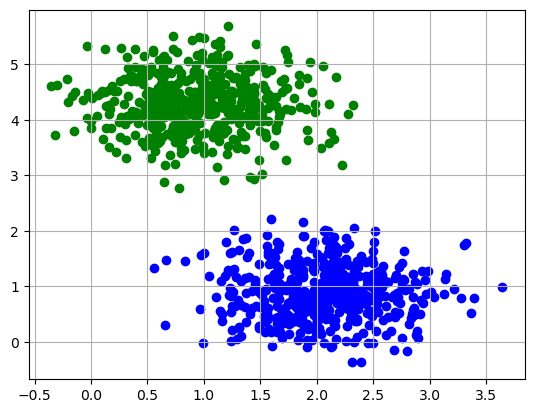

In [94]:
plt.scatter(X[np.argwhere(y==0),0], X[np.argwhere(y==0),1], c='g')
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='b')
plt.grid()

Está escalado

In [95]:
X=MinMaxScaler().fit_transform(X)

## Representación de los puntos tras MinMaxScaler

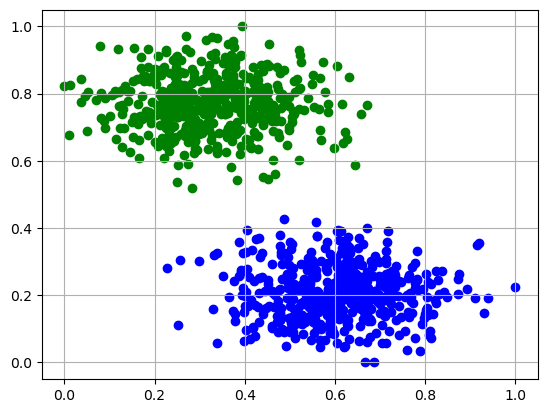

In [96]:
plt.scatter(X[np.argwhere(y==0),0], X[np.argwhere(y==0),1], c='g')
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='b')
plt.grid()

In [17]:
class neuron_simple_perceptron(object):
    def __init__(self, n_inputs=2, W=None, b=None):
        self.n_inputs = n_inputs
        self.W = W
        self.b = b
        if self.W is None:
            self.W = np.random.rand(1,self.n_inputs)-0.5
        if self.b is None:
            self.b = np.random.rand()-0.5
        return
    
    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).astype(int) #hace el producto escalar de dos vectores

    def fit(self, X, D):
        if np.sum(self.predict(X) == D) != D.shape[0]:
            continuar = True
            p = 0
            while continuar:
                v = p % X.shape[0]
                x = X[v].reshape(1,-1)
                y = self.predict(x)
                d = D[v]
                if y != d:
                    self.W  += d * x
                    self.b += d
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        continuar = False
                p += 1
        return
    
    def get_params(self):
        return self.W, self.b

In [18]:
ps = neuron_simple_perceptron(n_inputs=2)
ps.fit(X, 2*y-1)

In [22]:
w, bias = ps.get_params()

In [23]:
w

array([[ 0.88994142, -1.60354101]])

In [24]:
bias

0.338955605540759

$w_1*x_1 + w_2*x_2 + bias = 0$

## Recta

In [62]:
x1 = [0,1]
#x1 = np.linespace(0,1,10)
x2 = [-bias/w[0,1], (-bias/w[0,1]) - (w[0,0]/w[0,1])]

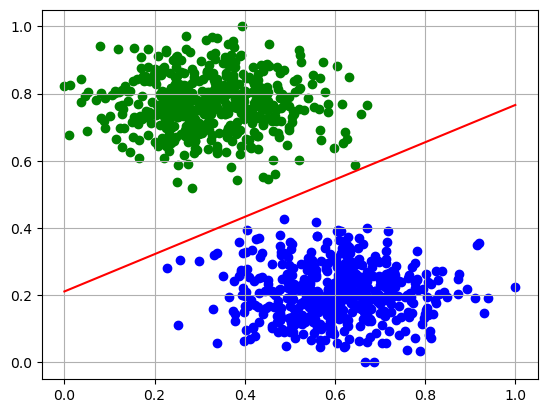

In [63]:
plt.scatter(X[np.argwhere(y==0),0], X[np.argwhere(y==0),1], c='g')
plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='b')
plt.plot(x1, x2, c='r')
plt.grid()

# Ejercicio 2

In [85]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, r2_score
import pandas as pd
from tqdm import tqdm

#### Datos

In [86]:
housing = fetch_california_housing()

In [87]:
X_housing = MinMaxScaler().fit_transform(housing.data)
y_housing = housing.target
X_housing.shape, y_housing.shape

((20640, 8), (20640,))

In [91]:
reg = SGDRegressor(tol=1e-6, max_iter = 5000)

## Validación cruzada

In [89]:
K = 10
kf = KFold(n_splits=K)

In [90]:
r_reg = pd.DataFrame(columns=['R2', 'Accuracy'])
k = 0
for train_index, test_index in tqdm(kf.split(X_housing),total=kf.get_n_splits(X)):
    reg = SGDRegressor(tol=1e-6, max_iter = 5000)
    reg.fit(X_housing[train_index, :], y_housing[train_index])
    y_predict = reg.predict(X_housing[test_index, :])
    error = np.mean(np.abs((y_predict - y_housing[test_index]) / y_housing[test_index]) < 0.2)
    r_reg.loc[k, :] = [r2_score(y_housing[test_index], y_predict), error]
    k += 1
r_reg.index.name = 'Fold'
r_reg

100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.30it/s]


,R2,Accuracy
Fold,,
0,0.550932,0.401647
1,0.584237,0.274709
2,0.388983,0.378391
3,0.495613,0.488857
4,0.536096,0.407461
5,0.549297,0.521802
6,0.453357,0.374031
7,0.417889,0.385174
8,0.464582,0.564922


## Media y desviación típica para ambas columnas

In [80]:
r_reg.mean(), r_reg.std()

(R2          0.501398
 Accuracy    0.419234
 dtype: object,
 R2          0.073261
 Accuracy    0.083938
 dtype: object)